In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import pylab
import datetime as dt
from math import floor

#Executando as funcoes do modulo Ibovespa
%run ./Ibovespa.ipynb
%run ./formas_de_acumulo.ipynb

#Desliga o aviso de chained assignment. Os dataframes de precos estao corretamente populados
pd.set_option('mode.chained_assignment', None)

In [2]:
#Os tickers sempre serao aleatorios conforme a funcao traz_tickers. 4 eh o valor padrao experimentado
tickers = traz_tickers(4)
start = dt.datetime(2010, 1, 1)
end = dt.datetime(2019, 12, 30)

In [3]:
#Aqui esta declarado o data frame
acoes = pd.DataFrame()
for t in tickers:
    acoes[t] = wb.DataReader(t, "yahoo", start, end)["Adj Close"]
acoes = acoes.round(2)

In [4]:
#Construcao da coluna de datas
dates =[]
for x in range(len(acoes)):
    newdate = str(acoes.index[x])
    newdate = newdate[0:10]
    dates.append(newdate)
acoes['DATA'] = dates


#Este comando movera a coluna de data para a primeira coluna, facilitando a analise
colunas = acoes.columns.tolist()
colunas = colunas[-1:] + colunas[:-1]
colunas
acoes = acoes[colunas]



#Separa uma coluna para mes + ano
acoes['DATA'] = acoes['DATA'].astype('datetime64[ns]')
acoes["Month_Day"] = pd.DatetimeIndex(acoes['DATA']).month
acoes["Month_Day"] = acoes["Month_Day"].astype(str)
acoes["Year"] = pd.DatetimeIndex(acoes['DATA']).year
acoes["Year"] = acoes["Year"].astype(str)
acoes["MesEAno"] = acoes["Month_Day"] + "-" + acoes["Year"]
acoes = acoes.drop(columns=['Year', 'Month_Day'])

#Dataframe contendo somente as datas
as_datas = pd.DataFrame(acoes["DATA"])


acoes.drop(columns =["DATA"], inplace = True)

In [5]:
#Aqui poderemos simular com todos os primeiros, maiores e menores precos de cada mes

primeiro = primeiro_preco()
primeiro.drop(columns=["MesEAno"], inplace = True)
maior = maior_preco()
maior.drop(columns=["MesEAno"], inplace = True)
menor = menor_preco()
menor.drop(columns=["MesEAno"], inplace = True)

#Declara o valor investido em cada ativo
investimento = 1000

#Declaracao do numero de acoes comprados EM CADA MES (eh preciso deixar no floor se for simular um numero exato,
# e float se a carteira for puramente teorica) 
n_primeiro = investimento / primeiro
n_maior = investimento / maior
n_menor = investimento / menor

In [6]:
#Valores finais eh a lista contendo o preco ajustado final de cada acao da lista. Feita conversao
#Para que a lista tenha 1 dimensao. O ideal eh sempre te-la no dia apos a analise
final = pd.DataFrame()
for t in tickers:
    final[t] = wb.DataReader(t, "yahoo", "2020-01-02", "2020-01-02")["Adj Close"]
final = final.round(2)
valores_finais = final.values.tolist()
valores_finais = valores_finais[0]

In [7]:
# Acoes acumuladas para demonstrar no grafico o acumulo de patrimonio ao longo do tempo
acoes_acum_primeiro = n_primeiro.cumsum()
acoes_acum_maior = n_maior.cumsum()
acoes_acum_menor = n_menor.cumsum()

In [8]:
first_acum = pat_primeiro(acoes_acum_primeiro)
major_acum = pat_maior(acoes_acum_maior)
minor_acum = pat_menor(acoes_acum_menor)

In [9]:
acumulos_feitos = (first_acum, major_acum, minor_acum)
mega_frame = pd.DataFrame()
mega_frame["COMPRA NOS PRIMEIROS PRECOS"] = pd.Series(first_acum["PATRIMONIO"])
mega_frame["COMPRA NOS MAIORES PRECOS"] = pd.Series(major_acum["PATRIMONIO"])
mega_frame["COMPRA NOS MENORES PRECOS"] = pd.Series(minor_acum["PATRIMONIO"])

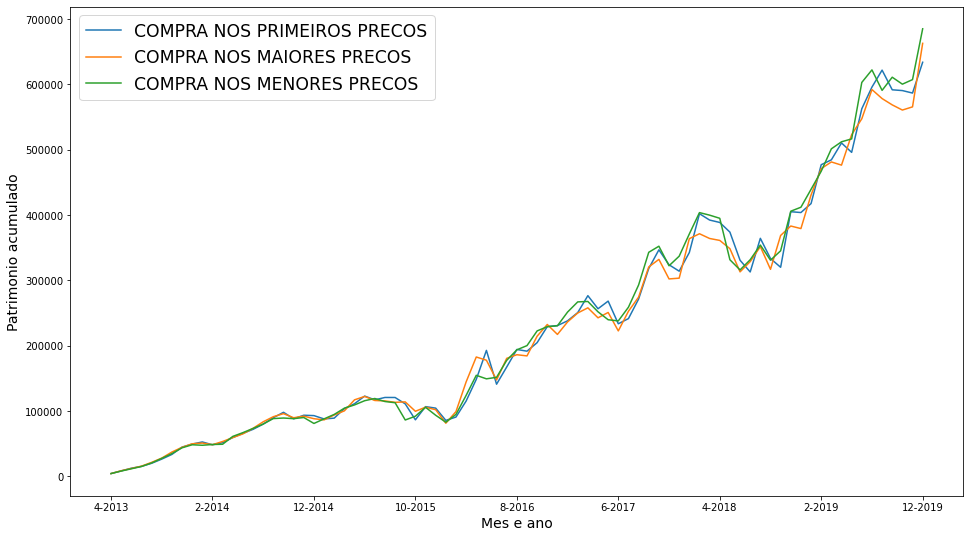

In [15]:
#Plota o megaframe das formas de acumulacao de patrimonio para visualizacao final
mega_frame.plot(figsize=(16,9))
plt.legend(fontsize="xx-large")
plt.xlabel("Mes e ano", fontsize = 14)
plt.ylabel("Patrimonio acumulado", fontsize = 14)
plt.savefig(fname = "Primeiro Teste", dpi=600)